Feature	Description
- CUSTID	Identification of Credit Cardholder (Categorical)
- BALANCE	Balance amount left in their account to make purchases
- BALANCEFREQUENCY	How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES	Amount of purchases made from the account
- ONEOFFPURCHASES	Maximum purchase amount spent in one-go
- INSTALLMENTSPURCHASES	Amount of purchase done in instalment
- CASHADVANCE	 Cash in advance given by the user
- PURCHASESFREQUENCY	How frequently the Purchases are being made, the score is between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY	 How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY	How frequently purchases in instalments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY	How frequently the cash in advance is being paid
- CASHADVANCETRX	Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX	Number of purchase transactions made
- CREDITLIMIT	Limit of Credit Card for user

- PAYMENTS	Amount of payment done by the user
- MINIMUM_PAYMENTS	The minimum amount of payments made by a user
- PRCFULLPAYMENT	Per cent of full payment paid by the user
- TENURE	Tenure of credit card service for user


With the increasing digitisation, the use of online payment methods using credit cards is increasing exponentially. With the increasing online payment, fraudulent credit card transactions are also increasing. So, it is important that credit card companies are able to recognise fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

 

Hence in this coding question, you need to train a logistic regression model in order to recognise whether the transactions are fraudulent or not.

 

In [2]:

# import the nesesary libraries
from pyspark.sql.session import SparkSession


In [3]:
# create a spark session
spark= SparkSession.builder.appName('Creditcard').getOrCreate()


22/11/29 16:36:52 WARN Utils: Your hostname, Dipanwitas-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.0.5 instead (on interface en0)
22/11/29 16:36:52 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/29 16:36:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/11/29 16:36:53 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/11/29 16:36:53 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/11/29 16:36:53 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.


In [5]:
data1=spark.read.csv('creditcard_fraud/creditcard_fraud.csv', inferSchema=True, header=True)

In [6]:
data1.show()

22/11/29 23:27:32 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------+-----+
|Time|                V1|                 V2|                V3|                 V4|                 V5|                 V6|                  V7|                 V8|                V9|                V10|               V11|               V12

In [8]:
data1.columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [9]:
#Check for the data
for c in data1.columns:
    print(data1.select(c).distinct().count())


45546
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
97499
19768
2


In [11]:
# thus they are all individual values
# create Vector
from pyspark.ml.feature import VectorAssembler


In [12]:
assembler= VectorAssembler(inputCols=['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount'], outputCol='features')

In [13]:
data2= assembler.transform(data1)

In [14]:
data2.show()

+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------+-----+--------------------+
|Time|                V1|                 V2|                V3|                 V4|                 V5|                 V6|                  V7|                 V8|                V9|                V10|               V11|               V12|                V13|                V14|                V15|                V16|                 V17|                V18|                V19|                V

In [15]:
data3= data2.select(['features', 'Class'])

In [16]:
data3= data3.withColumnRenamed('Class', 'label')

In [17]:
data3.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0,-1.359807133...|    0|
|[0.0,1.1918571113...|    0|
|[1.0,-1.358354061...|    0|
|[1.0,-0.966271711...|    0|
|[2.0,-1.158233093...|    0|
|[2.0,-0.425965884...|    0|
|[4.0,1.2296576345...|    0|
|[7.0,-0.644269442...|    0|
|[7.0,-0.894286082...|    0|
|[9.0,-0.338261752...|    0|
|[10.0,1.449043781...|    0|
|[10.0,0.384978215...|    0|
|[10.0,1.249998742...|    0|
|[11.0,1.069373587...|    0|
|[12.0,-2.79185476...|    0|
|[12.0,-0.75241704...|    0|
|[12.0,1.103215435...|    0|
|[13.0,-0.43690507...|    0|
|[14.0,-5.40125766...|    0|
|[15.0,1.492935976...|    0|
+--------------------+-----+
only showing top 20 rows



In [19]:
# Create test train data
train, test= data3.randomSplit([0.7, 0.3])

In [21]:
# Logistic Regression
from pyspark.ml.classification import LogisticRegression

In [23]:
lr= LogisticRegression(featuresCol='features', labelCol='label')

In [24]:
model= lr.fit(train)

22/11/29 23:37:54 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
22/11/29 23:37:55 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/11/29 23:37:55 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


In [25]:
model.coefficients

DenseVector([0.0, 0.0509, 0.2772, 0.3209, 1.3138, -0.2148, -0.6131, 0.1446, -0.0423, -0.1184, -0.6894, -0.0452, 0.6319, -0.6501, -1.1157, 0.3841, 1.1455, -0.1417, -0.8854, 0.3399, -0.2495, 0.741, 0.6094, -0.1154, -0.987, -0.2182, 1.2866, -1.1734, -0.6811, 0.0009])

In [26]:
model.intercept

-10.463594915949173

In [27]:
# roc
roc=model.summary.roc.toPandas()
pr=model.summary.pr.toPandas()


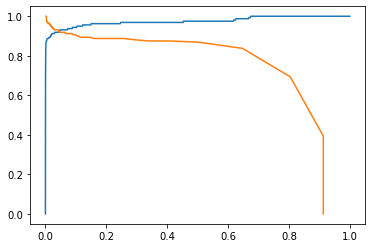

In [33]:
# plot ROC curve
# precision recall

import matplotlib.pyplot as plt

plt.plot(roc['FPR'], roc['TPR'])
plt.plot(pr['precision'], pr['recall'])
plt.show()

In [30]:
# AUC area under curve
model.summary.areaUnderROC

0.9746079855134818

In [34]:
model.summary.accuracy

0.9987693188322839

In [35]:
output= model.transform(test)

In [38]:
# calculate roc auc pr accuracy

# from table use Binary classification evaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator


In [41]:
evaluator= BinaryClassificationEvaluator()

In [43]:
# AUC
evaluator.evaluate(output)


0.9646202749576457